### El Haar2 parece andar mejor, pues considera todo el rango (igual que en matlab)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import matplotlib.pyplot as plt

In [2]:
#dust_file='Dust records interpolados 130k.xlsx'
dust_file='Talos Test.xlsx'
id_columns=['Name','Data id','Latitud','Longitud','Age units','Data units','Data length']
id_data=pd.read_excel(dust_file,sheet_name=0,usecols=id_columns)
df_data=pd.read_excel(dust_file,sheet_name=1,skiprows=1)
#df_data.head()

In [3]:
columns=df_data.size/len(df_data);lis=[]
new_length=np.array([])
for i in range(int(columns)):
    if (i+1)%2==1: 
        dupla=df_data[[df_data.columns[i],df_data.columns[i+1]]].dropna()
        dupla.index=[j for j in range(0, len(dupla))]
        lis.append(dupla)
        new_length=np.append(new_length,np.shape(dupla)[0])

In [4]:
id_data

,Name,Data id,Latitud,Longitud,Age units,Data units,Data length
0,Talos Dome,4,-72.817,159.183,ka BP,(µg/kg),9999


In [6]:
lis[0][lis[0].columns[0]]

0        3.792
1        3.793
2        3.794
3        3.795
4        3.796
         ...  
9993    14.435
9994    14.436
9995    14.437
9996    14.438
9997    14.439
Name: 3.791, Length: 9998, dtype: float64

In [7]:
def HaarFluctuation(x,y):
    calib=2; x=x*1000
    diff_year=x[1]-x[0]
    steps=2;steps_half=int(steps/2)
    
    ensemble_ave=np.array([])
    delta_t=np.array([])
    log_delta_t=np.array([])
    #print('ACAAAAA')
    while steps <= len(x)-1:
        #print(steps)
        delta_t=np.append(delta_t,steps*diff_year) #N° samples (steps) x diff años = delta_t en años
        log_delta_t=np.append(log_delta_t,np.log10(delta_t[-1])) 
        int_intervals=np.array([])
        inicio=steps
        while inicio<=len(x)-1:
            integration1=np.trapz(y[inicio-steps_half:inicio+1], x[inicio-steps_half:inicio+1])
            integration2=np.trapz(y[inicio-steps:inicio-steps_half+1], x[inicio-steps:inicio-steps_half+1])
            diff=2/(delta_t[-1])*(integration1-integration2)
            int_intervals=np.append(int_intervals,diff)
            inicio+=1
        
        maf=(np.mean(abs(int_intervals)))*calib
        ensemble_ave=np.append(ensemble_ave,maf)
        steps+=2
        steps_half=int(steps/2)
    return ensemble_ave,delta_t,log_delta_t   

In [8]:
[HF,steps,log_steps]=HaarFluctuation(lis[0][lis[0].columns[0]],lis[0][lis[0].columns[1]])

KeyboardInterrupt: 

In [182]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 10}

mtpl.rc('font', **font)

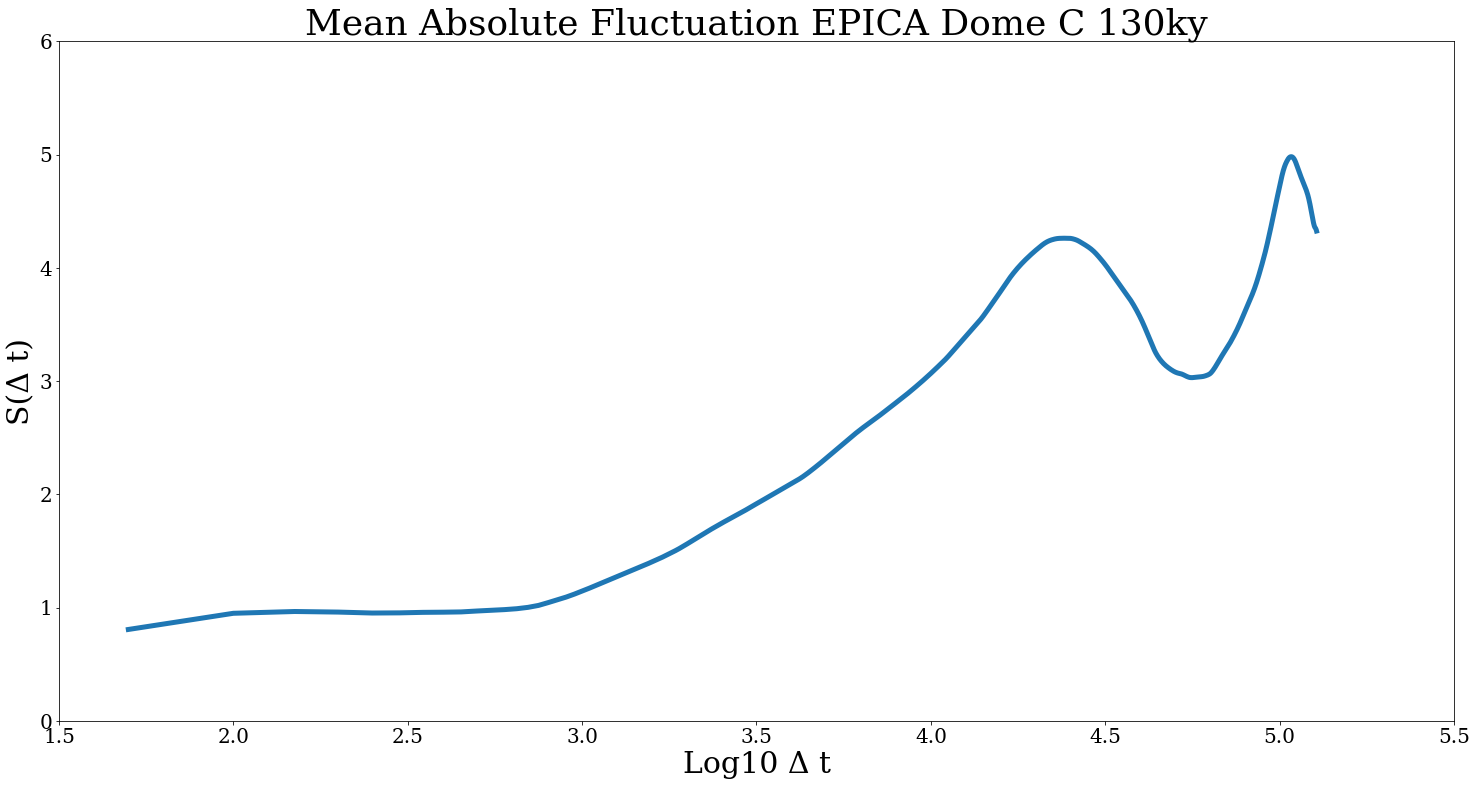

In [148]:
plt.subplots(figsize=(25, 12.5))
plt.plot(log_steps,HF,'-',linewidth=5)
plt.title('Mean Absolute Fluctuation '+id_data['Name'][1]+' 130ky')
plt.xlabel('Log10 \u0394 t')
plt.ylabel('S(\u0394 t)')

plt.xlim(1.5, 5.5)
plt.ylim(0, 6)

mtpl.rc('xtick', labelsize=20) 
mtpl.rc('ytick', labelsize=20) 

#plt.savefig('MAF '+id_data['Name'][1]+'.pdf')
plt.savefig('MAF '+id_data['Name'][1]+'.jpg')


plt.show()

In [159]:
[HF2,steps2,log_steps2]=HaarFluctuation(lis[0][lis[0].columns[0]],lis[0][lis[0].columns[1]])

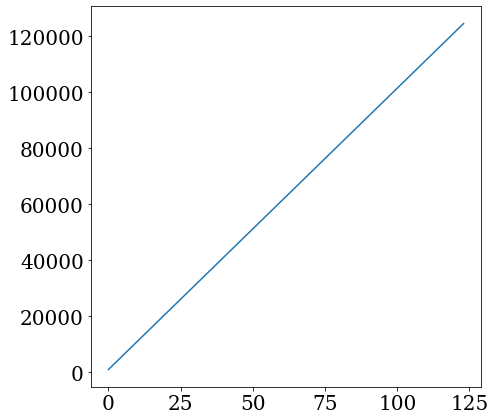

In [185]:
plt.subplots(figsize=(7,7))
plt.plot(steps2)

mtpl.rc('xtick', labelsize=20) 
mtpl.rc('ytick', labelsize=20)

plt.savefig(id_data['Name'][0]+' time steps.jpg',bbox_inches='tight')
plt.show()

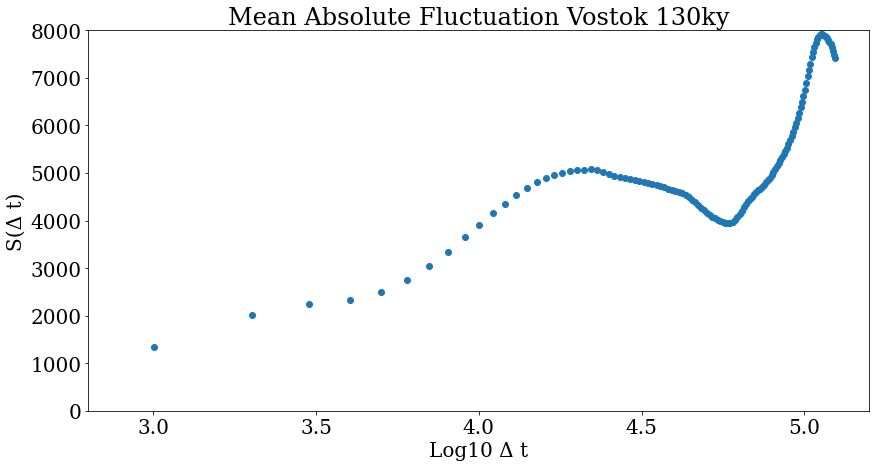

In [181]:
plt.subplots(figsize=(14, 7))
plt.plot(log_steps2,HF2,'o',linewidth=5)
plt.title('Mean Absolute Fluctuation '+id_data['Name'][0]+' 130ky')
plt.xlabel('Log10 \u0394 t')
plt.ylabel('S(\u0394 t)')

plt.xlim(2.8, 5.2)
plt.ylim(0, 8000)

mtpl.rc('xtick', labelsize=20) 
mtpl.rc('ytick', labelsize=20) 

#plt.savefig('MAF '+id_data['Name'][1]+'.pdf')
plt.savefig('MAF '+id_data['Name'][0]+'.jpg')


plt.show()

In [156]:
for i in range(len(lis[1][lis[1].columns[0]])-1):
               print(lis[1][lis[1].columns[0]][i+1]-lis[1][lis[1].columns[0]][i])

0.025000000000000022
0.024999999999999967
0.025000000000000022
0.024999999999999967
0.025000000000000022
0.025000000000000022
0.025000000000000022
0.02499999999999991
0.025000000000000022
0.025000000000000022
0.025000000000000022
0.025000000000000022
0.02499999999999991
0.025000000000000022
0.025000000000000022
0.025000000000000022
0.025000000000000022
0.02499999999999991
0.025000000000000022
0.025000000000000022
0.025000000000000022
0.025000000000000022
0.02499999999999991
0.025000000000000022
0.025000000000000022
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.02499999999999991
0.025000000000000133
0.02499999999999991
0.02500000

0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.02499999999

0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.024999999999991473
0.025000000000005684
0.02500000000

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5103    0.0
5104    0.0
5105    0.0
5106    0.0
5107    NaN
Name: Year.1, Length: 5108, dtype: float64